In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import pygal

In [5]:
# Load the dataset
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Find the maximum speed for each unique ID
max_speed_df = test_measure.groupby('ID')['Speed'].max().reset_index()
max_speed_df.rename(columns={'Speed': 'Max Speed'}, inplace=True)

# Merge the maximum speed with the subject_info
max_speed_df = pd.merge(max_speed_df, subject_info, on='ID')

# Function to calculate Fitness Index for each unique ID
def calculate_fitness_index(row):
    max_speed = row['Max Speed']
    weight = row['Weight']
    age = row['Age']
    fitness_index = (max_speed * 100) / weight * (50 / age)
    return fitness_index

# Apply the function to calculate Fitness Index
max_speed_df['Fitness Index'] = max_speed_df.apply(calculate_fitness_index, axis=1)

# Define range categories for Fitness Index
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
max_speed_df['Fitness Index Category'] = pd.cut(max_speed_df['Fitness Index'], bins=bins, labels=labels, right=False)

# Count the number of unique IDs in each Fitness Index category
category_counts = max_speed_df['Fitness Index Category'].value_counts().sort_index()

# Create a funnel chart object
funnel_chart = pygal.Funnel()
funnel_chart.title = 'Fitness Index Categories Funnel Chart for Unique IDs'

# Add data to the chart
for category, count in category_counts.items():
    funnel_chart.add(str(category), count)

# Render the chart to a file
funnel_chart.render_to_file('fitness_index_funnel_chart.svg')


In [7]:
# Find the maximum speed for each unique ID
max_speed_df = test_measure.groupby('ID')['Speed'].max().reset_index()
max_speed_df.rename(columns={'Speed': 'Max Speed'}, inplace=True)

# Merge the maximum speed with the subject_info
max_speed_df = pd.merge(max_speed_df, subject_info, on='ID')

# Function to calculate Fitness Index for each unique ID
def calculate_fitness_index(row):
    max_speed = row['Max Speed']
    weight = row['Weight']
    age = row['Age']
    fitness_index = (max_speed * 100) / weight * (50 / age)
    return fitness_index

# Apply the function to calculate Fitness Index
max_speed_df['Fitness Index'] = max_speed_df.apply(calculate_fitness_index, axis=1)

# Define range categories for Fitness Index
bins = [0, 20, 40, 60, 80, 100]
labels = ['Very Low', 'Low', 'Moderate', 'High', 'Very High']
max_speed_df['Fitness Index Category'] = pd.cut(max_speed_df['Fitness Index'], bins=bins, labels=labels, right=False)

# Count the number of unique IDs in each Fitness Index category
category_counts = max_speed_df['Fitness Index Category'].value_counts().sort_index()

# Create a bar chart object
bar_chart = pygal.Bar()
bar_chart.title = 'Fitness Index Categories Bar Chart for Unique IDs'

# Add data to the chart
for category, count in category_counts.items():
    bar_chart.add(str(category), count)

# Render the chart to a file
bar_chart.render_to_file('fitness_index_bar_chart.svg')


In [15]:
 max_speed_df.describe(include='all')

,ID,Max Speed,Age,Weight,Height,Humidity,Temperature,Sex,ID_test,Fitness Index,Fitness Index Category
count,992.000000,992.000000,992.000000,992.000000,992.000000,962.000000,962.000000,992.000000,992,992.000000,957
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,992,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1_1,NaN,Low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,412
mean,424.890121,16.382056,28.979133,73.383367,174.913508,48.211435,22.818565,0.150202,NaN,45.522342,NaN
std,243.832478,2.535794,10.076653,12.005361,7.950027,8.560991,2.784066,0.357449,NaN,22.056697,NaN
min,1.000000,7.000000,10.800000,41.000000,150.000000,23.700000,15.000000,0.000000,NaN,10.773909,NaN
25%,214.750000,15.000000,21.100000,66.000000,170.000000,42.000000,20.800000,0.000000,NaN,29.382105,NaN
50%,428.500000,16.900000,27.100000,73.000000,175.000000,47.000000,22.900000,0.000000,NaN,41.419028,NaN
75%,626.250000,18.100000,36.325000,80.225000,180.000000,54.000000,24.400000,0.000000,NaN,55.494775,NaN


In [ ]:
For participant ID 765 show trend of  any three variables against time in a single canvas ?

C:\Users\akals\AppData\Local\Temp\ipykernel_21840\1759253841.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  participant_data['time_minutes'] = participant_data['time'] / 60


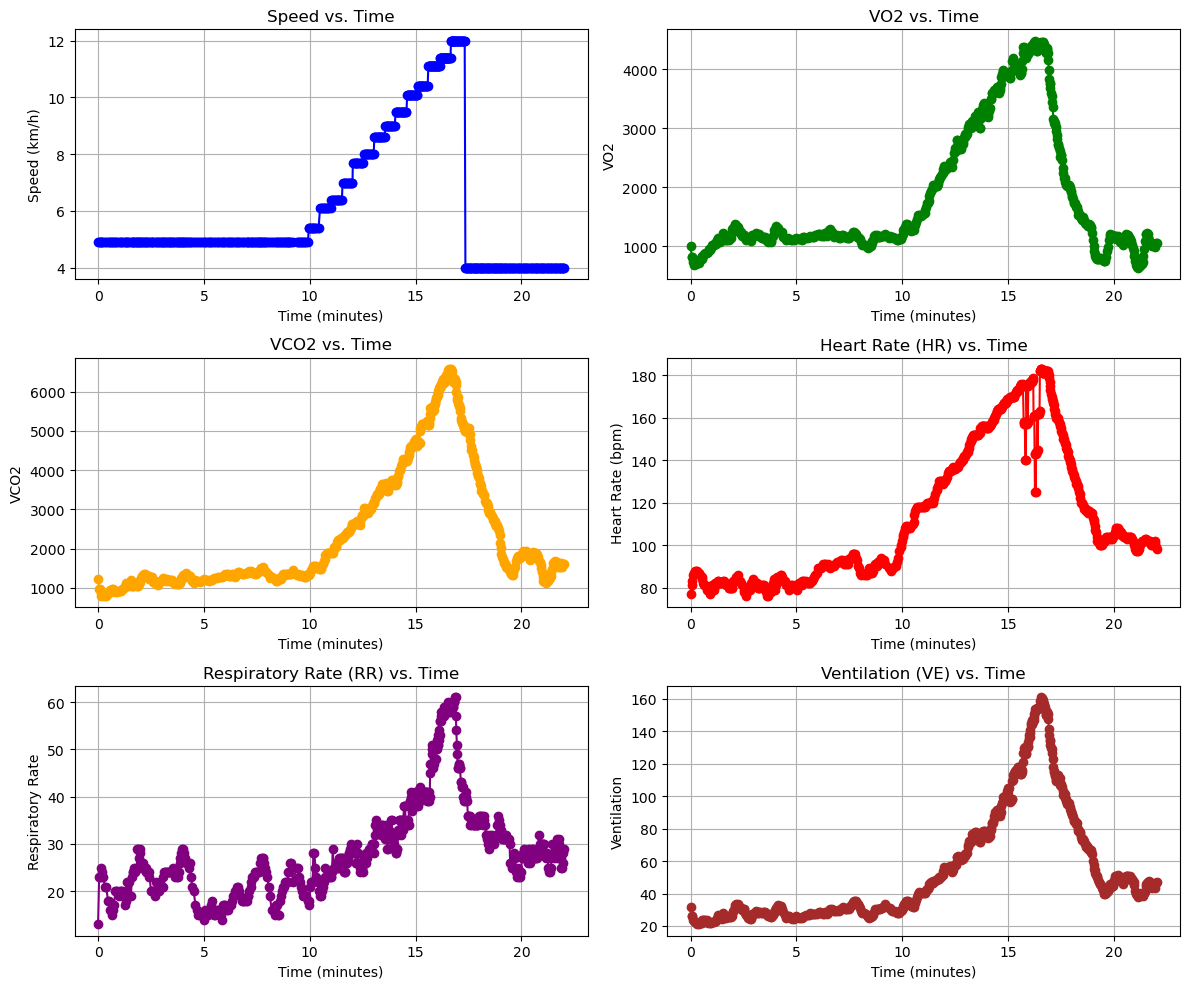

In [27]:
# Filter data for the specific participant ID
participant_id = 725
participant_data = test_measure_df[test_measure_df['ID'] == participant_id]

# Convert time from seconds to minutes
participant_data['time_minutes'] = participant_data['time'] / 60

# Plot multiple parameters against time for the specific participant
plt.figure(figsize=(12, 10))

plt.subplot(3, 2, 1)
plt.plot(participant_data['time_minutes'], participant_data['Speed'], marker='o', color='blue')
plt.title('Speed vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Speed (km/h)')
plt.grid(True)

plt.subplot(3, 2, 2)
plt.plot(participant_data['time_minutes'], participant_data['VO2'], marker='o', color='green')
plt.title('VO2 vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('VO2')
plt.grid(True)

plt.subplot(3, 2, 3)
plt.plot(participant_data['time_minutes'], participant_data['VCO2'], marker='o', color='orange')
plt.title('VCO2 vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('VCO2')
plt.grid(True)

plt.subplot(3, 2, 4)
plt.plot(participant_data['time_minutes'], participant_data['HR'], marker='o', color='red')
plt.title('Heart Rate (HR) vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)

plt.subplot(3, 2, 5)
plt.plot(participant_data['time_minutes'], participant_data['RR'], marker='o', color='purple')
plt.title('Respiratory Rate (RR) vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Respiratory Rate')
plt.grid(True)

plt.subplot(3, 2, 6)
plt.plot(participant_data['time_minutes'], participant_data['VE'], marker='o', color='brown')
plt.title('Ventilation (VE) vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Ventilation')
plt.grid(True)

plt.tight_layout()
plt.show()


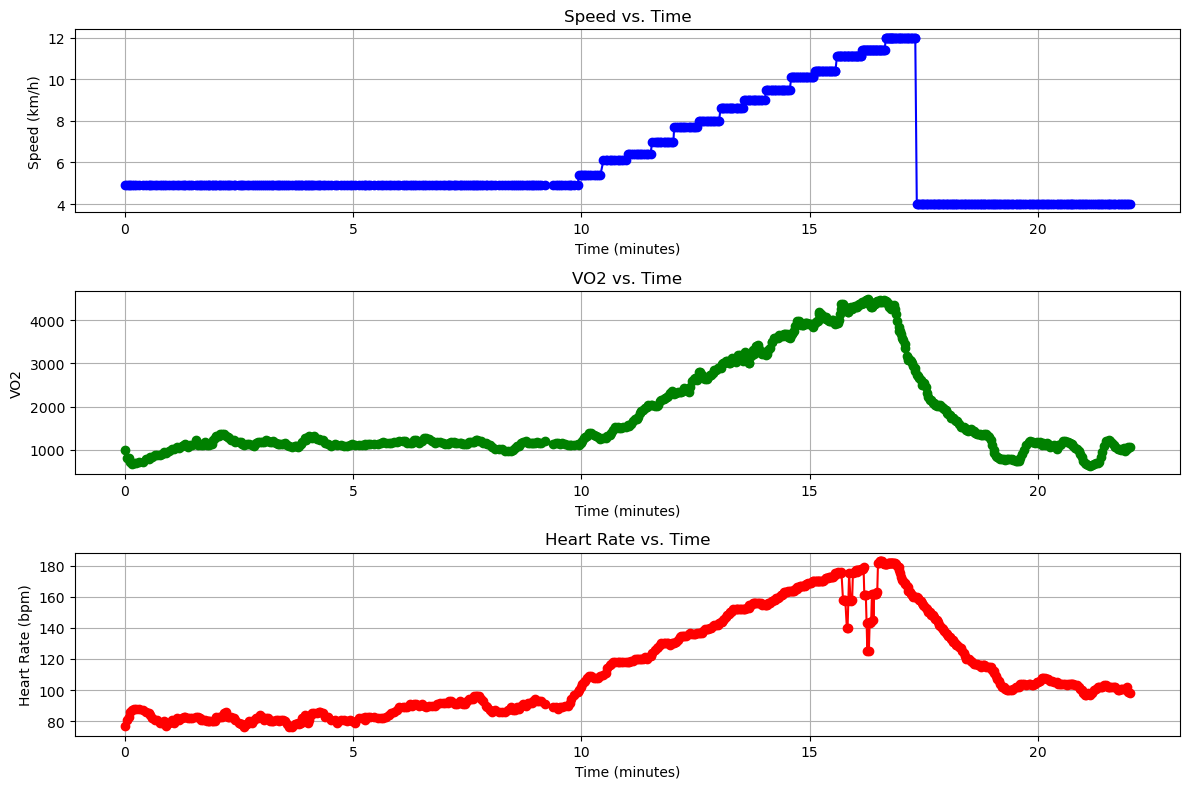

In [31]:
# Assuming your data is loaded in test_measure_df
# Filter data for the specific participant ID
participant_id = 725
participant_data = test_measure_df[test_measure_df['ID'] == participant_id].copy()

# Convert time from seconds to minutes
participant_data.loc[:, 'time_minutes'] = participant_data['time'] / 60

# Plot three parameters against time for the specific participant
plt.figure(figsize=(12, 8))

plt.subplot(3, 1, 1)
plt.plot(participant_data['time_minutes'], participant_data['Speed'], marker='o', color='blue')
plt.title('Speed vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Speed (km/h)')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(participant_data['time_minutes'], participant_data['VO2'], marker='o', color='green')
plt.title('VO2 vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('VO2')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(participant_data['time_minutes'], participant_data['HR'], marker='o', color='red')
plt.title('Heart Rate vs. Time')
plt.xlabel('Time (minutes)')
plt.ylabel('Heart Rate (bpm)')
plt.grid(True)

plt.tight_layout()
plt.show()


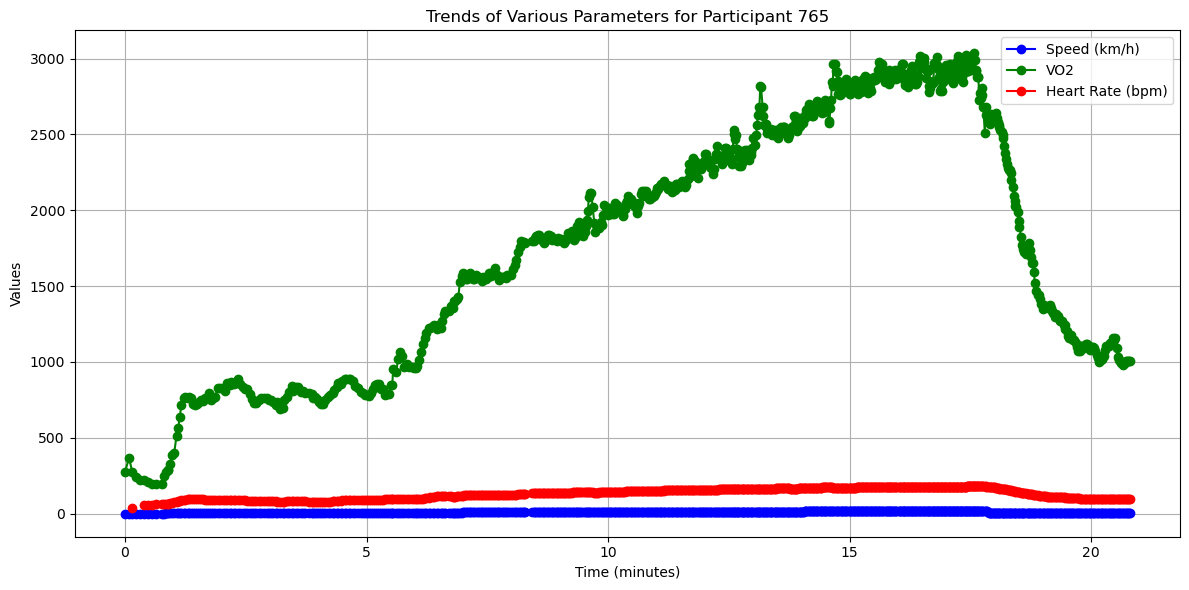

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is loaded in test_measure_df
# Filter data for the specific participant ID
participant_id = 765
participant_data = test_measure_df[test_measure_df['ID'] == participant_id].copy()

# Convert time from seconds to minutes
participant_data['time_minutes'] = participant_data['time'] / 60

# Plot multiple parameters against time for the specific participant on a single canvas
plt.figure(figsize=(12, 6))

# Plot Speed
plt.plot(participant_data['time_minutes'], participant_data['Speed'], marker='o', color='blue', label='Speed (km/h)')
# Plot VO2
plt.plot(participant_data['time_minutes'], participant_data['VO2'], marker='o', color='green', label='VO2')
# Plot Heart Rate
plt.plot(participant_data['time_minutes'], participant_data['HR'], marker='o', color='red', label='Heart Rate (bpm)')

plt.title(f'Trends of Various Parameters for Participant {participant_id}')
plt.xlabel('Time (minutes)')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


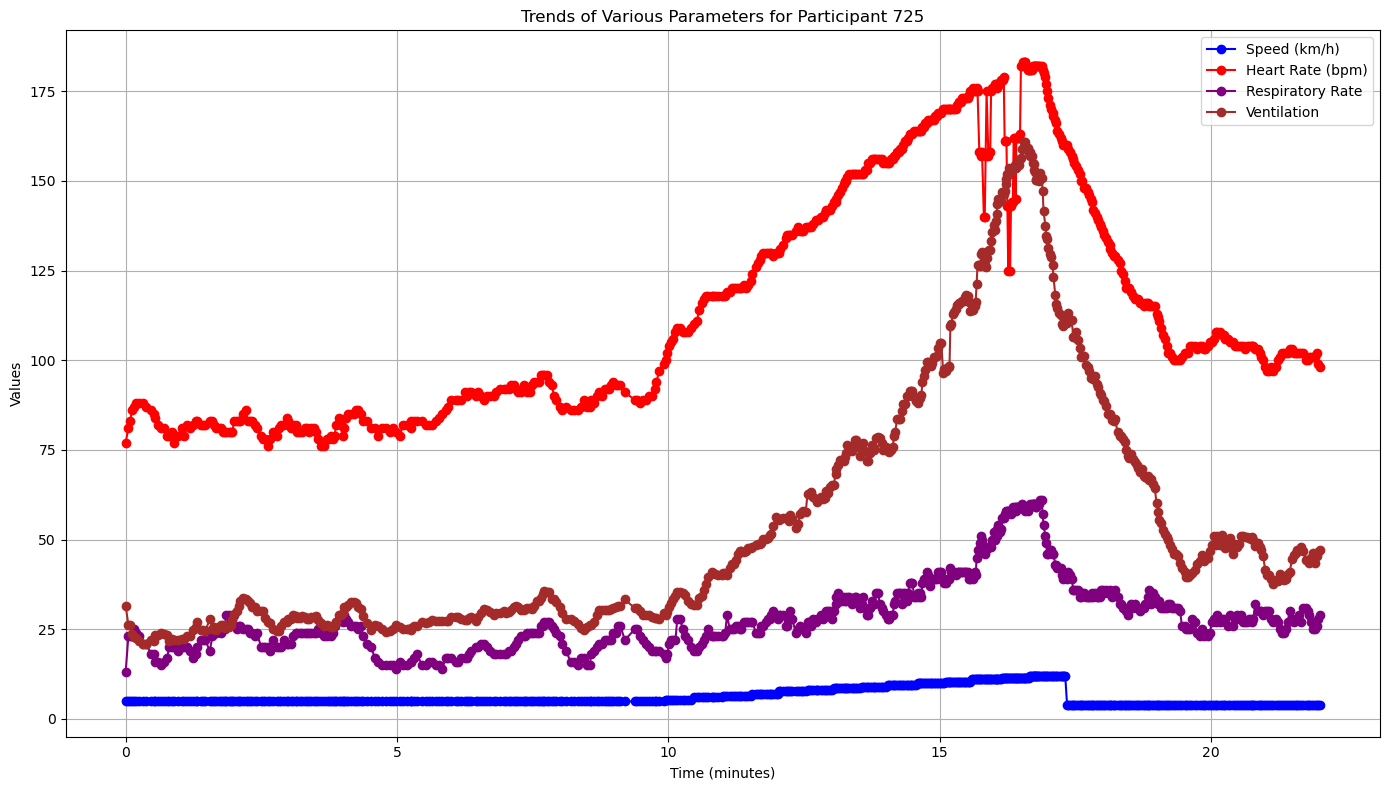

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your data is loaded in test_measure_df
# Filter data for the specific participant ID
participant_id = 725
participant_data = test_measure_df[test_measure_df['ID'] == participant_id].copy()

# Convert time from seconds to minutes
participant_data['time_minutes'] = participant_data['time'] / 60

# Plot multiple parameters against time for the specific participant on a single canvas
plt.figure(figsize=(14, 8))

# Plot Speed
plt.plot(participant_data['time_minutes'], participant_data['Speed'], marker='o', color='blue', label='Speed (km/h)')

# Plot VO2
#plt.plot(participant_data['time_minutes'], participant_data['VO2'], marker='o', color='green', label='VO2')

# Plot Heart Rate
plt.plot(participant_data['time_minutes'], participant_data['HR'], marker='o', color='red', label='Heart Rate (bpm)')

# Plot Respiratory Rate
plt.plot(participant_data['time_minutes'], participant_data['RR'], marker='o', color='purple', label='Respiratory Rate')

# Plot Ventilation
plt.plot(participant_data['time_minutes'], participant_data['VE'], marker='o', color='brown', label='Ventilation')

plt.title(f'Trends of Various Parameters for Participant {participant_id}')
plt.xlabel('Time (minutes)')
plt.ylabel('Values')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


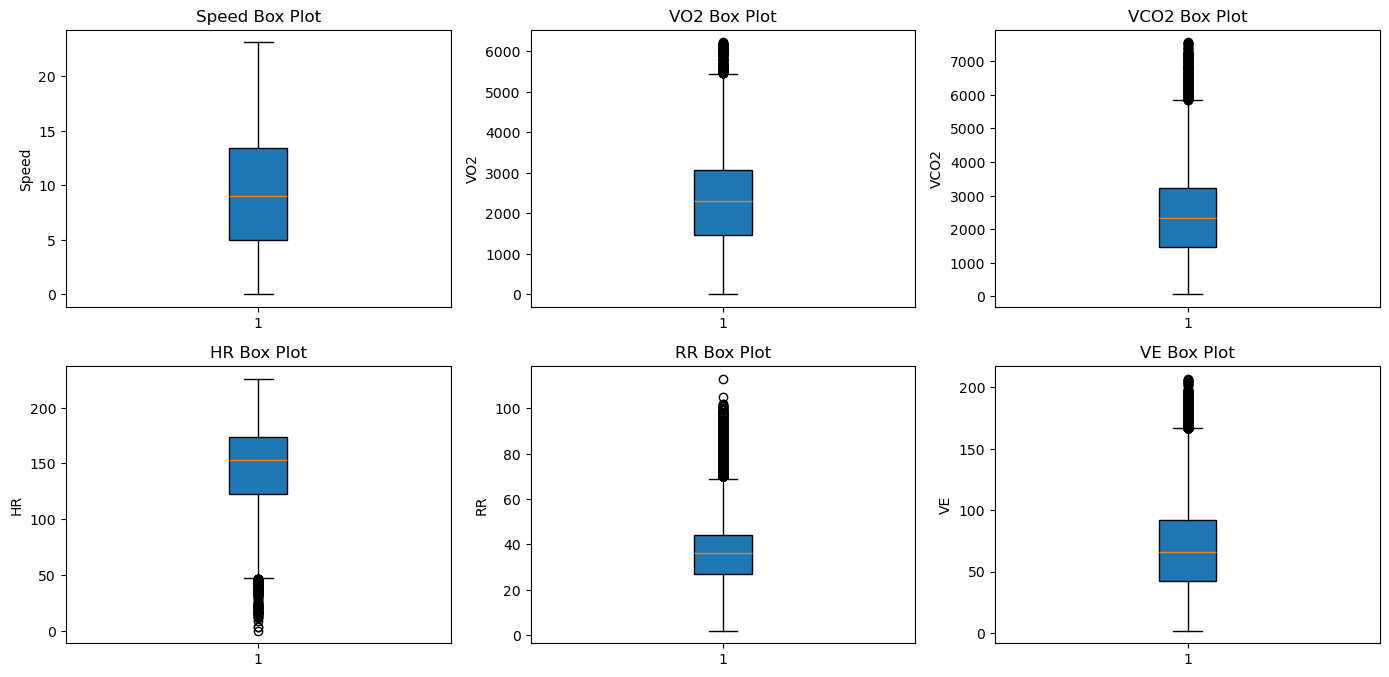

In [47]:
# Create box plots for each numerical column
plt.figure(figsize=(14, 10))
numerical_columns = ['Speed', 'VO2', 'VCO2', 'HR', 'RR', 'VE']
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    plt.boxplot(test_measure_df[column].dropna(), vert=True, patch_artist=True)
    plt.title(f'{column} Box Plot')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [49]:
# Filter the test_measure dataset to find the initial speed values
initial_speed_df = test_measure[test_measure['time'] == 0]

# Check if all initial speeds are 5 km/h
all_start_at_5kmh = initial_speed_df['Speed'].eq(5).all()

if all_start_at_5kmh:
    print("All tests start at 5 km/h.")
else:
    print("Not all tests start at 5 km/h.")

# Inspect the initial speeds
print(initial_speed_df[['ID', 'Speed']])


Not all tests start at 5 km/h.
         ID  Speed
0         2    5.0
602       3    5.0
1207      4    0.0
1720      5    5.0
2301      6    5.0
...     ...    ...
572209  855    0.0
572828  856    4.9
573447  856    4.9
574067  856    4.9
574584  857    5.0

[992 rows x 2 columns]


In [51]:
subject_info

,Age,Weight,Height,Humidity,Temperature,Sex,ID,ID_test
0,10.8,48.8,163.0,39.0,20.7,1,543,543_1
1,11.8,41.0,150.0,41.0,22.3,1,11,11_1
2,12.2,46.0,160.0,37.0,21.5,0,829,829_1
3,13.2,71.0,190.0,49.0,23.8,1,284,284_1
4,13.7,53.8,169.7,40.0,25.3,0,341,341_1
...,...,...,...,...,...,...,...,...
987,59.1,64.7,172.0,38.0,24.4,0,856,856_2
988,59.7,65.2,172.0,51.0,16.8,0,856,856_3
989,61.3,102.0,185.0,56.0,20.5,0,390,390_1
990,61.6,74.0,169.0,46.0,23.9,0,596,596_1


In [53]:
test_measure

,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID
0,0,5.0,63.0,478.0,360.0,27,13.3,2_1,2
1,2,5.0,75.0,401.0,295.0,23,10.3,2_1,2
2,4,5.0,82.0,449.0,319.0,29,12.2,2_1,2
3,7,5.0,87.0,461.0,340.0,28,12.8,2_1,2
4,9,5.0,92.0,574.0,417.0,28,14.6,2_1,2
...,...,...,...,...,...,...,...,...,...
575082,926,5.0,148.0,1350.0,1699.0,35,65.7,857_1,857
575083,927,5.0,147.0,1275.0,1605.0,32,60.1,857_1,857
575084,929,5.0,147.0,1259.0,1566.0,29,57.0,857_1,857
575085,931,5.0,147.0,1278.0,1587.0,31,58.5,857_1,857


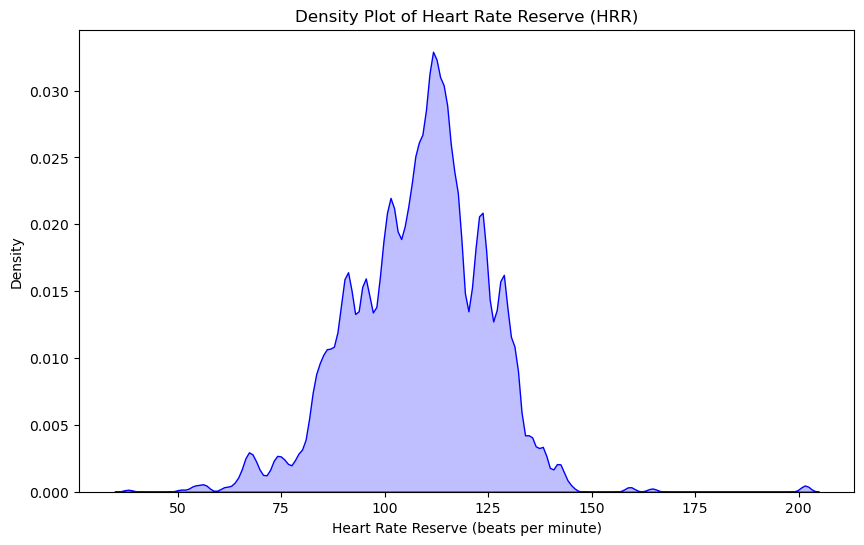

In [157]:
# Merge the datasets on 'ID' (assuming the correct key)
joined_df = pd.merge(test_measure, subject_info, on='ID')

# Filter the test_measure dataset to find the minimum heart rate at time 0
min_hr_at_time_0 = test_measure[test_measure['time'] == 0].groupby('ID')['HR'].min().reset_index()
min_hr_at_time_0.rename(columns={'HR': 'HR_rest'}, inplace=True)

# Merge the HR_rest data into the joined_df
joined_df = pd.merge(joined_df, min_hr_at_time_0, on='ID')

# Calculate HR_max using the formula 220 - age
joined_df['HR_max'] = 220 - joined_df['Age']

# Calculate Heart Rate Reserve (HRR)
joined_df['HRR'] = joined_df['HR_max'] - joined_df['HR_rest']

# Create a density plot to visualize the distribution of HRR
plt.figure(figsize=(10, 6))
sns.kdeplot(joined_df['HRR'], fill=True, color='blue')
plt.title('Density Plot of Heart Rate Reserve (HRR)')
plt.xlabel('Heart Rate Reserve (beats per minute)')
plt.ylabel('Density')
plt.show()

In [171]:
# Find the minimum HRR
min_HRR = joined_df['HRR'].min()

# Find the maximum HRR
max_HRR = joined_df['HRR'].max()

print(f'Minimum HRR: {min_HRR}')
print(f'Maximum HRR: {max_HRR}')


Minimum HRR: 38.0
Maximum HRR: 201.6


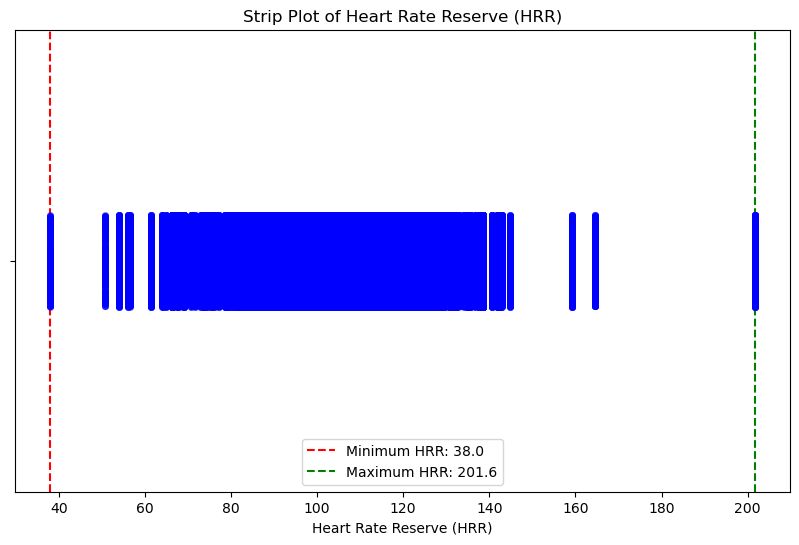

In [173]:

# Calculate HRR
joined_df['HRR'] = joined_df['HR_max'] - joined_df['HR_rest']

# Create a strip plot
plt.figure(figsize=(10, 6))
sns.stripplot(x='HRR', data=joined_df, jitter=True, color='blue', alpha=0.5)

# Highlight the minimum and maximum HRR
plt.axvline(min_HRR, color='red', linestyle='--', label=f'Minimum HRR: {min_HRR}')
plt.axvline(max_HRR, color='green', linestyle='--', label=f'Maximum HRR: {max_HRR}')

plt.title('Strip Plot of Heart Rate Reserve (HRR)')
plt.xlabel('Heart Rate Reserve (HRR)')
plt.legend()
plt.show()


In [63]:
# Load the datasets
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Filter the test_measure dataset to find the starting speed for each participant
starting_speed_df = test_measure[test_measure['time'] == 0]

# Filter for speeds not equal to 5 km/h
not_5kmh_df = starting_speed_df[starting_speed_df['Speed'] != 5]

# Join the filtered records with subject_info to get their ages
result_df = pd.merge(not_5kmh_df, subject_info, on='ID')

# Inspect the result
print(result_df[['ID', 'Speed', 'Age']])


      ID  Speed   Age
0      4    0.0  28.5
1      1    0.0  32.7
2     40    0.0  15.0
3    163    0.0  20.1
4    247    0.0  32.1
..   ...    ...   ...
408  856    4.9  59.1
409  856    4.9  59.7
410  856    4.9  58.7
411  856    4.9  59.1
412  856    4.9  59.7

[413 rows x 3 columns]


In [75]:
# Load the datasets
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Filter for a specific test
test_id = '2_1'
test_data = test_measure[test_measure['ID_test'] == test_id]

# Initialize phase column for the specific test
test_data['Phase'] = 'undefined'

# Function to classify phases for a single test
def classify_phases(df):
    # Find the warm-up phase (speeds <= 5 km/h)
    warm_up_end_index = df[df['Speed'] > 5].index[0]
    df.loc[:warm_up_end_index, 'Phase'] = 'Warm-up'
    
    # Find the exertion phase (first increase in speed > 5 km/h until attaining maximum speed and maximum VO2)
    max_speed_index = df['Speed'].idxmax()
    if df['VO2'].dropna().empty:
        max_vo2_index = max_speed_index
    else:
        max_vo2_index = df['VO2'].dropna().idxmax()
    exertion_end_index = max(max_speed_index, max_vo2_index)
    df.loc[warm_up_end_index:exertion_end_index, 'Phase'] = 'Exertion'
    
    # Find the cool-down phase (drastic slow down in speed to <= 5 km/h)
    cool_down_candidates = df[(df['Speed'] <= 5) & (df.index > exertion_end_index)]
    if not cool_down_candidates.empty:
        cool_down_start_index = cool_down_candidates.index[0]
        df.loc[cool_down_start_index:, 'Phase'] = 'Cool-down'
    
    return df

# Apply the function to classify phases for the specific test
test_data = classify_phases(test_data)

# Merge the classified test data with subject_info on both ID and ID_test
joined_df = pd.merge(test_data, subject_info, on=['ID', 'ID_test'])

# Inspect the result
print(joined_df[['ID', 'ID_test', 'time', 'Speed', 'VO2', 'Phase']])


     ID ID_test  time  Speed     VO2      Phase
0     2     2_1     0    5.0   478.0    Warm-up
1     2     2_1     2    5.0   401.0    Warm-up
2     2     2_1     4    5.0   449.0    Warm-up
3     2     2_1     7    5.0   461.0    Warm-up
4     2     2_1     9    5.0   574.0    Warm-up
..   ..     ...   ...    ...     ...        ...
597   2     2_1  1038    5.0  1308.0  Cool-down
598   2     2_1  1040    5.0  1314.0  Cool-down
599   2     2_1  1042    5.0  1286.0  Cool-down
600   2     2_1  1044    5.0  1325.0  Cool-down
601   2     2_1  1046    5.0  1255.0  Cool-down

[602 rows x 6 columns]


C:\Users\akals\AppData\Local\Temp\ipykernel_21840\3691469840.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Phase'] = 'undefined'


In [77]:
import pandas as pd

# Load the datasets
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Filter for a specific test
test_id = '2_1'
test_data = test_measure[test_measure['ID_test'] == test_id].copy()

# Initialize phase column for the specific test
test_data.loc[:, 'Phase'] = 'undefined'

# Function to classify phases for a single test
def classify_phases(df):
    # Find the warm-up phase (speeds <= 5 km/h)
    warm_up_end_index = df[df['Speed'] > 5].index[0]
    df.loc[:warm_up_end_index, 'Phase'] = 'Warm-up'
    
    # Find the exertion phase (first increase in speed > 5 km/h until attaining maximum speed and maximum VO2)
    max_speed_index = df['Speed'].idxmax()
    if df['VO2'].dropna().empty:
        max_vo2_index = max_speed_index
    else:
        max_vo2_index = df['VO2'].dropna().idxmax()
    exertion_end_index = max(max_speed_index, max_vo2_index)
    df.loc[warm_up_end_index:exertion_end_index, 'Phase'] = 'Exertion'
    
    # Find the cool-down phase (drastic slow down in speed to <= 5 km/h)
    cool_down_candidates = df[(df['Speed'] <= 5) & (df.index > exertion_end_index)]
    if not cool_down_candidates.empty:
        cool_down_start_index = cool_down_candidates.index[0]
        df.loc[cool_down_start_index:, 'Phase'] = 'Cool-down'
    
    return df

# Apply the function to classify phases for the specific test
test_data = classify_phases(test_data)

# Merge the classified test data with subject_info on both ID and ID_test
joined_df = pd.merge(test_data, subject_info, on=['ID', 'ID_test'])

# Inspect the result
print(joined_df[['ID', 'ID_test', 'time', 'Speed', 'VO2', 'Phase']])


     ID ID_test  time  Speed     VO2      Phase
0     2     2_1     0    5.0   478.0    Warm-up
1     2     2_1     2    5.0   401.0    Warm-up
2     2     2_1     4    5.0   449.0    Warm-up
3     2     2_1     7    5.0   461.0    Warm-up
4     2     2_1     9    5.0   574.0    Warm-up
..   ..     ...   ...    ...     ...        ...
597   2     2_1  1038    5.0  1308.0  Cool-down
598   2     2_1  1040    5.0  1314.0  Cool-down
599   2     2_1  1042    5.0  1286.0  Cool-down
600   2     2_1  1044    5.0  1325.0  Cool-down
601   2     2_1  1046    5.0  1255.0  Cool-down

[602 rows x 6 columns]


In [79]:
import pandas as pd

# Assuming `joined_df` is your DataFrame with the phases classified
# Display the DataFrame for ID_test = '2_1'
id_test = '2_1'
filtered_df = joined_df[joined_df['ID_test'] == id_test]

# Print the DataFrame to check the classification of phases
print(filtered_df[['ID', 'ID_test', 'time', 'Speed', 'VO2', 'Phase']])


     ID ID_test  time  Speed     VO2      Phase
0     2     2_1     0    5.0   478.0    Warm-up
1     2     2_1     2    5.0   401.0    Warm-up
2     2     2_1     4    5.0   449.0    Warm-up
3     2     2_1     7    5.0   461.0    Warm-up
4     2     2_1     9    5.0   574.0    Warm-up
..   ..     ...   ...    ...     ...        ...
597   2     2_1  1038    5.0  1308.0  Cool-down
598   2     2_1  1040    5.0  1314.0  Cool-down
599   2     2_1  1042    5.0  1286.0  Cool-down
600   2     2_1  1044    5.0  1325.0  Cool-down
601   2     2_1  1046    5.0  1255.0  Cool-down

[602 rows x 6 columns]


In [81]:
# Identify indices for phase transitions
warm_up_end_index = filtered_df[filtered_df['Speed'] > 5].index[0]
max_speed_index = filtered_df['Speed'].idxmax()
max_vo2_index = filtered_df['VO2'].dropna().idxmax()
exertion_end_index = max(max_speed_index, max_vo2_index)

print("Warm-up ends at index:", warm_up_end_index)
print("Exertion ends at index:", exertion_end_index)


Warm-up ends at index: 74
Exertion ends at index: 497


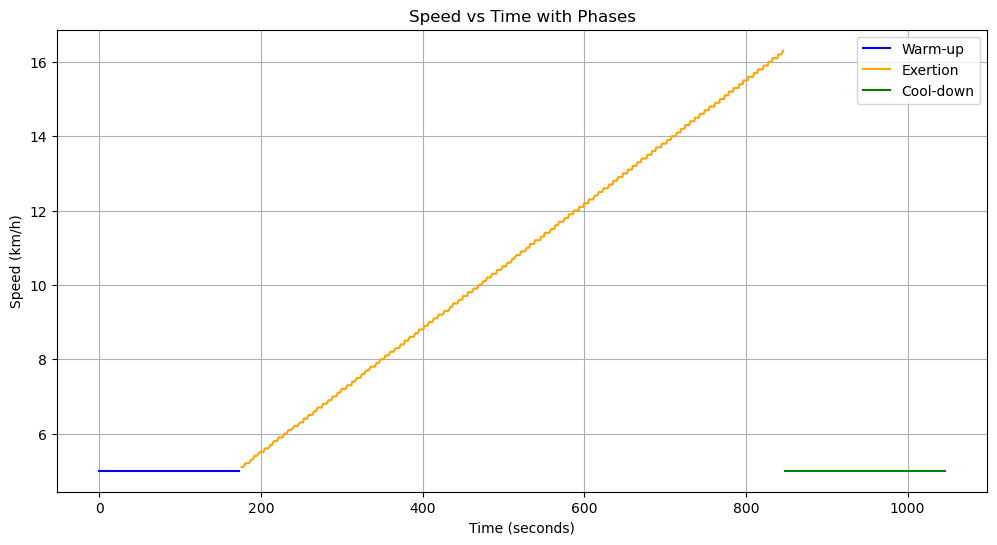

In [83]:
# Plot the phases against time
plt.figure(figsize=(12, 6))

# Plot Speed with phase colors
for phase, color in zip(['Warm-up', 'Exertion', 'Cool-down'], ['blue', 'orange', 'green']):
    phase_data = joined_df[joined_df['Phase'] == phase]
    plt.plot(phase_data['time'], phase_data['Speed'], label=phase, color=color)

plt.xlabel('Time (seconds)')
plt.ylabel('Speed (km/h)')
plt.title('Speed vs Time with Phases')
plt.legend()
plt.grid(True)
plt.show()

In [87]:
import pandas as pd

# Load the datasets
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Reset index to avoid ambiguity with 'ID_test'
test_measure = test_measure.reset_index(drop=True)

# Initialize phase column for the entire dataset
test_measure['Phase'] = 'undefined'

# Function to classify phases for each test
def classify_phases(df):
    # Find the warm-up phase (speeds <= 5 km/h)
    warm_up_end_index = df[df['Speed'] > 5].index[0]
    df.loc[:warm_up_end_index, 'Phase'] = 'Warm-up'
    
    # Find the exertion phase (first increase in speed > 5 km/h until attaining maximum speed and maximum VO2)
    max_speed_index = df['Speed'].idxmax()
    if df['VO2'].dropna().empty:
        max_vo2_index = max_speed_index
    else:
        max_vo2_index = df['VO2'].dropna().idxmax()
    exertion_end_index = max(max_speed_index, max_vo2_index)
    df.loc[warm_up_end_index:exertion_end_index, 'Phase'] = 'Exertion'
    
    # Find the cool-down phase (drastic slow down in speed to <= 5 km/h)
    cool_down_candidates = df[(df['Speed'] <= 5) & (df.index > exertion_end_index)]
    if not cool_down_candidates.empty:
        cool_down_start_index = cool_down_candidates.index[0]
        df.loc[cool_down_start_index:, 'Phase'] = 'Cool-down'
    
    return df

# Apply the function to classify phases for each test
test_measure = test_measure.groupby('ID_test', group_keys=False).apply(classify_phases)

# Merge the classified test_measure dataset with subject_info
joined_df = pd.merge(test_measure, subject_info, on=['ID', 'ID_test'])

# Inspect the result
print(joined_df[['ID', 'ID_test', 'time', 'Speed', 'VO2', 'Phase']])


         ID ID_test  time  Speed     VO2      Phase
0         2     2_1     0    5.0   478.0    Warm-up
1         2     2_1     2    5.0   401.0    Warm-up
2         2     2_1     4    5.0   449.0    Warm-up
3         2     2_1     7    5.0   461.0    Warm-up
4         2     2_1     9    5.0   574.0    Warm-up
...     ...     ...   ...    ...     ...        ...
575082  857   857_1   926    5.0  1350.0  Cool-down
575083  857   857_1   927    5.0  1275.0  Cool-down
575084  857   857_1   929    5.0  1259.0  Cool-down
575085  857   857_1   931    5.0  1278.0  Cool-down
575086  857   857_1   933    5.0  1299.0  Cool-down

[575087 rows x 6 columns]


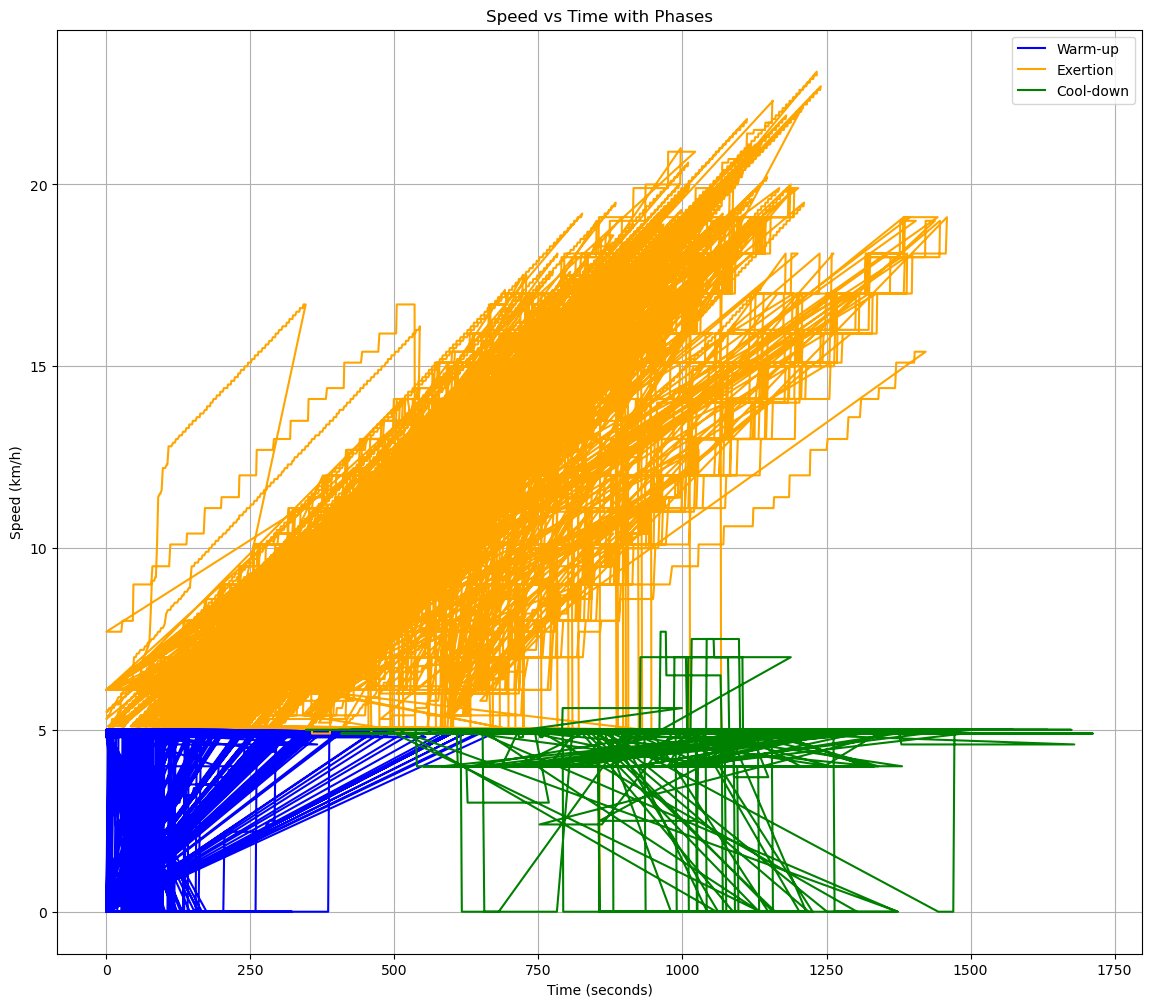

In [91]:
# Plot Speed with phase colors
plt.figure(figsize=(14, 12))
for phase, color in zip(['Warm-up', 'Exertion', 'Cool-down'], ['blue', 'orange', 'green']):
    phase_data = joined_df[joined_df['Phase'] == phase]
    plt.plot(phase_data['time'], phase_data['Speed'], label=phase, color=color)

plt.xlabel('Time (seconds)')
plt.ylabel('Speed (km/h)')
plt.title('Speed vs Time with Phases')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
joined_df.describe(include= 'all')

,time,Speed,HR,VO2,VCO2,RR,VE,ID_test,ID,Phase,Age,Weight,Height,Humidity,Temperature,Sex
count,575087.000000,575087.000000,574106.000000,570216.000000,570216.000000,575087.000000,575087.000000,575087,575087.000000,575087,575087.000000,575087.000000,575087.000000,558615.000000,558615.000000,575087.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,992,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,431_1,NaN,Exertion,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1008,NaN,382191,NaN,NaN,NaN,NaN,NaN,NaN
mean,628.126172,9.607958,146.940892,2313.617768,2390.075203,36.491513,69.304931,NaN,425.424579,NaN,28.622601,72.953785,175.045647,48.174878,22.851854,0.129429
std,325.588844,4.520384,32.206372,978.103888,1159.791822,12.177244,33.558583,NaN,245.443493,NaN,10.041739,11.609127,7.795193,8.489641,2.806460,0.335675
min,0.000000,0.000000,0.000000,-5.000000,51.000000,2.000000,1.800000,NaN,1.000000,NaN,10.800000,41.000000,150.000000,23.700000,15.000000,0.000000
25%,375.000000,5.000000,123.000000,1464.000000,1455.000000,27.000000,42.200000,NaN,208.000000,NaN,20.700000,66.000000,170.000000,42.000000,20.800000,0.000000
50%,646.000000,9.000000,153.000000,2309.000000,2320.000000,36.000000,66.300000,NaN,431.000000,NaN,26.800000,73.000000,175.000000,47.000000,22.900000,0.000000
75%,875.000000,13.400000,174.000000,3060.000000,3218.000000,44.000000,92.000000,NaN,630.000000,NaN,35.800000,80.000000,180.000000,54.000000,24.500000,0.000000


In [97]:
import pandas as pd

# Assuming `joined_df` is your DataFrame with the phases classified

# Initialize an empty list to store the results
results = []

# Group by 'ID_test' and iterate through each group
for id_test, group in joined_df.groupby('ID_test'):
    # Calculate the duration for each phase
    phase_durations = group.groupby('Phase')['time'].agg(['min', 'max']).reset_index()
    phase_durations['Duration'] = phase_durations['max'] - phase_durations['min']
    phase_durations['ID_test'] = id_test
    
    # Append the results to the list
    results.append(phase_durations[['ID_test', 'Phase', 'Duration']])

# Concatenate all the results into a single DataFrame
phase_durations_df = pd.concat(results, ignore_index=True)

# Inspect the result
print(phase_durations_df)


     ID_test      Phase  Duration
0      100_1  Cool-down       178
1      100_1   Exertion       667
2      100_1    Warm-up       172
3      100_1  undefined         0
4      101_1  Cool-down       194
...      ...        ...       ...
3747   99_54    Warm-up        46
3748     9_1  Cool-down       214
3749     9_1   Exertion       472
3750     9_1    Warm-up       202
3751     9_1  undefined         2

[3752 rows x 3 columns]


In [99]:
joined_df['Phase']. value_counts()

Phase
Exertion     382191
Cool-down    108898
Warm-up       74547
undefined      9451
Name: count, dtype: int64

In [101]:
import pandas as pd

# Load the datasets
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Reset index to avoid ambiguity
test_measure = test_measure.reset_index(drop=True)

# Initialize phase column
test_measure['Phase'] = 'undefined'

def classify_phases(df):
    """
    Classifies phases of the test based on Speed and VO2 levels.
    """
    if df.empty or 'Speed' not in df or 'VO2' not in df:
        return df
    
    # Identify warm-up phase (speed <= 5 km/h)
    warm_up_end_index = df[df['Speed'] > 5].index.min()
    if pd.isna(warm_up_end_index):
        return df  # No warm-up phase detected
    df.loc[:warm_up_end_index, 'Phase'] = 'Warm-up'
    
    # Identify exertion phase
    max_speed_index = df['Speed'].idxmax() if not df['Speed'].isna().all() else warm_up_end_index
    max_vo2_index = df['VO2'].idxmax() if not df['VO2'].isna().all() else warm_up_end_index
    exertion_end_index = max(max_speed_index, max_vo2_index)
    df.loc[warm_up_end_index:exertion_end_index, 'Phase'] = 'Exertion'
    
    # Identify cool-down phase (speed <= 5 km/h after exertion)
    cool_down_candidates = df[(df['Speed'] <= 5) & (df.index > exertion_end_index)]
    if not cool_down_candidates.empty:
        cool_down_start_index = cool_down_candidates.index.min()
        df.loc[cool_down_start_index:, 'Phase'] = 'Cool-down'
    
    return df

# Apply the function to classify phases per test
test_measure = test_measure.groupby('ID_test', group_keys=False).apply(classify_phases)

# Merge with subject information
joined_df = pd.merge(test_measure, subject_info, on=['ID', 'ID_test'], how='left')

# Display results
print(joined_df[['ID', 'ID_test', 'time', 'Speed', 'VO2', 'Phase']])


         ID ID_test  time  Speed     VO2      Phase
0         2     2_1     0    5.0   478.0    Warm-up
1         2     2_1     2    5.0   401.0    Warm-up
2         2     2_1     4    5.0   449.0    Warm-up
3         2     2_1     7    5.0   461.0    Warm-up
4         2     2_1     9    5.0   574.0    Warm-up
...     ...     ...   ...    ...     ...        ...
575082  857   857_1   926    5.0  1350.0  Cool-down
575083  857   857_1   927    5.0  1275.0  Cool-down
575084  857   857_1   929    5.0  1259.0  Cool-down
575085  857   857_1   931    5.0  1278.0  Cool-down
575086  857   857_1   933    5.0  1299.0  Cool-down

[575087 rows x 6 columns]


In [105]:
import pandas as pd

# Load the datasets
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Reset index to avoid ambiguity
test_measure = test_measure.reset_index(drop=True)

# Initialize phase column
test_measure['Phase'] = 'undefined'

def classify_phases(df):
    """
    Classifies phases of the test based on Speed and VO2 levels.
    """
    if df.empty or 'Speed' not in df or 'VO2' not in df:
        return df
    
    # Identify warm-up phase (speed <= 5 km/h)
    warm_up_candidates = df[df['Speed'] > 5]
    if warm_up_candidates.empty:
        return df  # No warm-up phase detected
    warm_up_end_index = warm_up_candidates.index.min()
    df.loc[:warm_up_end_index, 'Phase'] = 'Warm-up'
    
    # Identify exertion phase
    max_speed_index = df['Speed'].idxmax() if not df['Speed'].isna().all() else warm_up_end_index
    max_vo2_index = df['VO2'].idxmax() if not df['VO2'].isna().all() else warm_up_end_index
    exertion_end_index = max(max_speed_index, max_vo2_index)
    df.loc[warm_up_end_index:exertion_end_index, 'Phase'] = 'Exertion'
    
    # Identify cool-down phase (speed drops but is not necessarily <= 5 km/h)
    if exertion_end_index < len(df) - 1:
        cool_down_candidates = df[(df['Speed'] < df.loc[exertion_end_index, 'Speed']) & (df.index > exertion_end_index)]
        if not cool_down_candidates.empty:
            cool_down_start_index = cool_down_candidates.index.min()
            df.loc[cool_down_start_index:, 'Phase'] = 'Cool-down'
    
    return df

# Apply the function to classify phases per test
test_measure = test_measure.groupby('ID_test', group_keys=False).apply(classify_phases)

# Merge with subject information
joined_df = pd.merge(test_measure, subject_info, on=['ID', 'ID_test'], how='left')

# Display results
print(joined_df[['ID', 'ID_test', 'time', 'Speed', 'VO2', 'Phase']])


         ID ID_test  time  Speed     VO2      Phase
0         2     2_1     0    5.0   478.0    Warm-up
1         2     2_1     2    5.0   401.0    Warm-up
2         2     2_1     4    5.0   449.0    Warm-up
3         2     2_1     7    5.0   461.0    Warm-up
4         2     2_1     9    5.0   574.0    Warm-up
...     ...     ...   ...    ...     ...        ...
575082  857   857_1   926    5.0  1350.0  undefined
575083  857   857_1   927    5.0  1275.0  undefined
575084  857   857_1   929    5.0  1259.0  undefined
575085  857   857_1   931    5.0  1278.0  undefined
575086  857   857_1   933    5.0  1299.0  undefined

[575087 rows x 6 columns]


In [107]:
joined_df['Phase']. value_counts()

Phase
Exertion     382191
undefined    118245
Warm-up       74547
Cool-down       104
Name: count, dtype: int64

In [109]:
import pandas as pd

# Load the datasets
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Reset index to avoid ambiguity
test_measure = test_measure.reset_index(drop=True)

# Initialize phase column
test_measure['Phase'] = 'undefined'

def classify_phases(df):
    """
    Classifies phases of the test based on Speed and VO2 levels.
    """
    if df.empty or 'Speed' not in df or 'VO2' not in df:
        return df
    
    # Identify warm-up phase (speed <= 5 km/h)
    warm_up_end_candidates = df[df['Speed'] > 5]
    if warm_up_end_candidates.empty:
        return df  # No warm-up phase detected
    warm_up_end_index = warm_up_end_candidates.index.min()
    df.loc[:warm_up_end_index, 'Phase'] = 'Warm-up'
    
    # Identify exertion phase (from first speed > 5 to peak speed/VO2)
    max_speed_index = df['Speed'].idxmax()
    max_vo2_index = df['VO2'].idxmax() if not df['VO2'].isna().all() else max_speed_index
    exertion_end_index = max(max_speed_index, max_vo2_index)
    df.loc[warm_up_end_index:exertion_end_index, 'Phase'] = 'Exertion'
    
    # Identify cool-down phase (speed drops significantly after exertion phase)
    cool_down_candidates = df[(df['Speed'] < df.loc[exertion_end_index, 'Speed'] * 0.8) & (df.index > exertion_end_index)]
    if not cool_down_candidates.empty:
        cool_down_start_index = cool_down_candidates.index.min()
        df.loc[cool_down_start_index:, 'Phase'] = 'Cool-down'
    
    return df

# Apply the function to classify phases per test
test_measure = test_measure.groupby('ID_test', group_keys=False).apply(classify_phases)

# Merge with subject information
joined_df = pd.merge(test_measure, subject_info, on=['ID', 'ID_test'], how='left')

# Display results
print(joined_df[['ID', 'ID_test', 'time', 'Speed', 'VO2', 'Phase']])


         ID ID_test  time  Speed     VO2      Phase
0         2     2_1     0    5.0   478.0    Warm-up
1         2     2_1     2    5.0   401.0    Warm-up
2         2     2_1     4    5.0   449.0    Warm-up
3         2     2_1     7    5.0   461.0    Warm-up
4         2     2_1     9    5.0   574.0    Warm-up
...     ...     ...   ...    ...     ...        ...
575082  857   857_1   926    5.0  1350.0  Cool-down
575083  857   857_1   927    5.0  1275.0  Cool-down
575084  857   857_1   929    5.0  1259.0  Cool-down
575085  857   857_1   931    5.0  1278.0  Cool-down
575086  857   857_1   933    5.0  1299.0  Cool-down

[575087 rows x 6 columns]


In [111]:
joined_df['Phase']. value_counts()

Phase
Exertion     382191
Cool-down    105439
Warm-up       74547
undefined     12910
Name: count, dtype: int64

In [115]:
import pandas as pd

# Load the datasets
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Reset index to avoid ambiguity
test_measure = test_measure.reset_index(drop=True)

# Initialize phase column
test_measure['Phase'] = 'undefined'

def classify_phases(df):
    """
    Classifies phases of the test based on Speed and VO2 levels.
    """
    if df.empty or 'Speed' not in df or 'VO2' not in df:
        return df
    
    # Identify warm-up phase (speed <= 5 km/h)
    warm_up_end_candidates = df[df['Speed'] > 5]
    if warm_up_end_candidates.empty:
        return df  # No warm-up phase detected
    warm_up_end_index = warm_up_end_candidates.index.min()
    df.loc[:warm_up_end_index, 'Phase'] = 'Warm-up'
    
    # Identify exertion phase (from first speed > 5 to peak speed/VO2)
    max_speed_index = df['Speed'].idxmax()
    max_vo2_index = df['VO2'].idxmax() if not df['VO2'].isna().all() else max_speed_index
    exertion_start_index = warm_up_end_index + 1 if warm_up_end_index + 1 < len(df) else warm_up_end_index
    exertion_end_index = max(max_speed_index, max_vo2_index)
    df.loc[exertion_start_index:exertion_end_index, 'Phase'] = 'Exertion'
    
    # Identify cool-down phase (speed drops significantly after exertion phase)
    cool_down_candidates = df[(df['Speed'] < df.loc[exertion_end_index, 'Speed'] * 0.8) & (df.index > exertion_end_index)]
    cool_down_start_index = len(df)  # Default to end of dataframe if no cool-down phase detected
    if not cool_down_candidates.empty:
        cool_down_start_index = cool_down_candidates.index.min()
        df.loc[cool_down_start_index:, 'Phase'] = 'Cool-down'
    
    # Fill any remaining undefined values between warm-up and cool-down with 'Exertion'
    df.loc[(df['Phase'] == 'undefined') & (df.index > warm_up_end_index) & (df.index < cool_down_start_index), 'Phase'] = 'Exertion'
    
    return df

# Apply the function to classify phases per test
test_measure = test_measure.groupby('ID_test', group_keys=False).apply(classify_phases)

# Merge with subject information
joined_df = pd.merge(test_measure, subject_info, on=['ID', 'ID_test'], how='left')

# Display results
print(joined_df[['ID', 'ID_test', 'time', 'Speed', 'VO2', 'Phase']])


         ID ID_test  time  Speed     VO2      Phase
0         2     2_1     0    5.0   478.0    Warm-up
1         2     2_1     2    5.0   401.0    Warm-up
2         2     2_1     4    5.0   449.0    Warm-up
3         2     2_1     7    5.0   461.0    Warm-up
4         2     2_1     9    5.0   574.0    Warm-up
...     ...     ...   ...    ...     ...        ...
575082  857   857_1   926    5.0  1350.0  Cool-down
575083  857   857_1   927    5.0  1275.0  Cool-down
575084  857   857_1   929    5.0  1259.0  Cool-down
575085  857   857_1   931    5.0  1278.0  Cool-down
575086  857   857_1   933    5.0  1299.0  Cool-down

[575087 rows x 6 columns]


In [117]:
joined_df['Phase']. value_counts()

Phase
Exertion     391616
Cool-down    105439
Warm-up       74548
undefined      3484
Name: count, dtype: int64

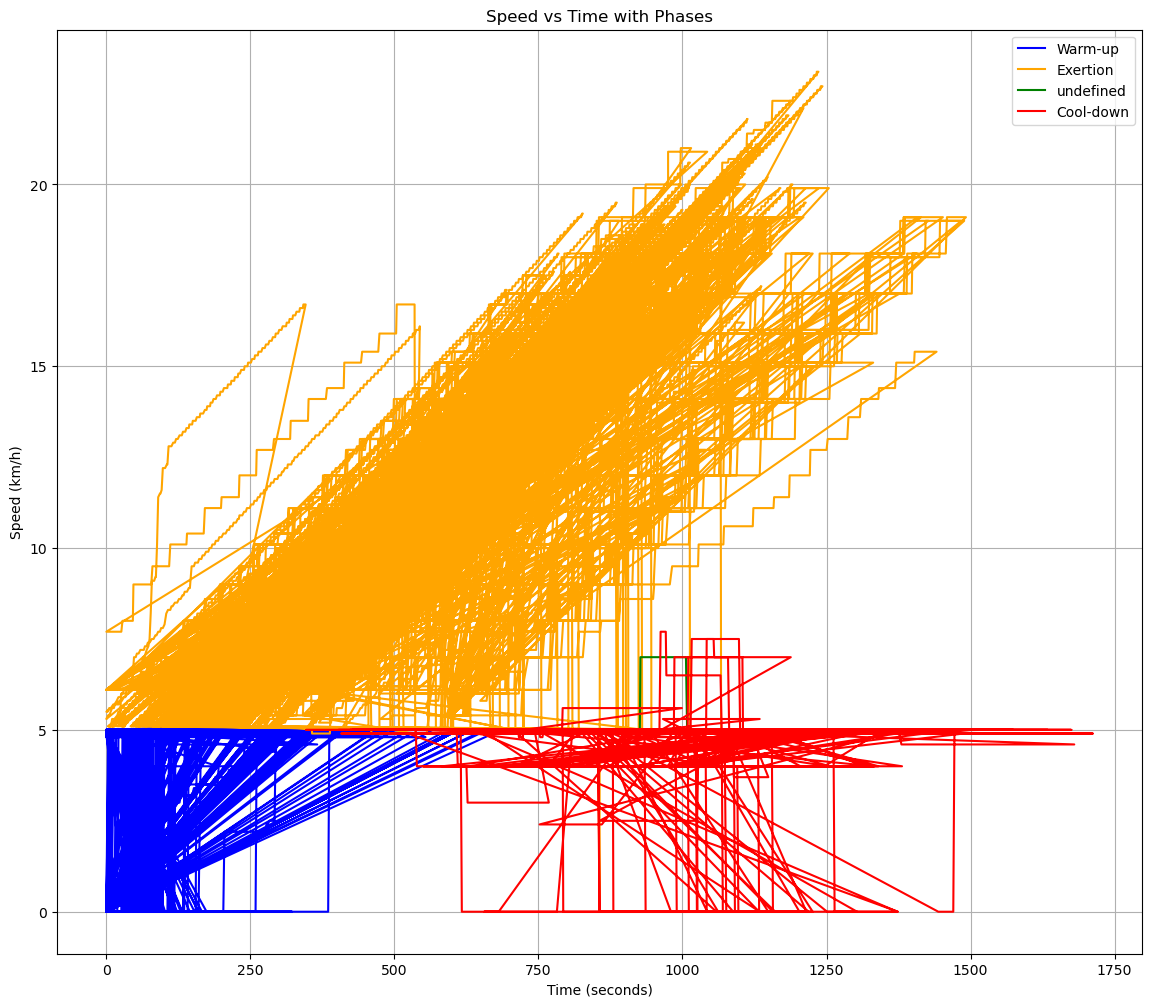

In [121]:
# Plot Speed with phase colors
plt.figure(figsize=(14, 12))
for phase, color in zip(['Warm-up', 'Exertion','undefined', 'Cool-down'], ['blue', 'orange', 'green','red']):
    phase_data = joined_df[joined_df['Phase'] == phase]
    plt.plot(phase_data['time'], phase_data['Speed'], label=phase, color=color)

plt.xlabel('Time (seconds)')
plt.ylabel('Speed (km/h)')
plt.title('Speed vs Time with Phases')
plt.legend()
plt.grid(True)
plt.show()

In [127]:
import pandas as pd

# Load the datasets
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Reset index to avoid ambiguity
test_measure = test_measure.reset_index(drop=True)

# Initialize phase column
test_measure['Phase'] = 'undefined'

def classify_phases(df):
    """
    Classifies phases of the test based on Speed and VO2 levels.
    """
    if df.empty or 'Speed' not in df or 'VO2' not in df:
        return df
    
    # Identify warm-up phase (speed <= 5 km/h)
    warm_up_end_candidates = df[df['Speed'] > 5]
    if warm_up_end_candidates.empty:
        return df  # No warm-up phase detected
    warm_up_end_index = warm_up_end_candidates.index.min()
    df.loc[:warm_up_end_index, 'Phase'] = 'Warm-up'
    
    # Identify exertion phase (from first speed > 5 to peak speed/VO2)
    exertion_start_index = warm_up_end_index + 1 if warm_up_end_index + 1 < len(df) else warm_up_end_index
    max_speed_index = df['Speed'].idxmax()
    max_vo2_index = df['VO2'].idxmax() if not df['VO2'].isna().all() else max_speed_index
    exertion_end_index = max(max_speed_index, max_vo2_index)
    df.loc[exertion_start_index:exertion_end_index, 'Phase'] = 'Exertion'
    
    # Identify cool-down phase (speed between max speed and stabilization below 8 km/h)
    cool_down_candidates = df[(df['Speed'] < df.loc[exertion_end_index, 'Speed'] * 0.8) & (df.index > exertion_end_index)]
    cool_down_start_index = len(df)  # Default to end of dataframe if no cool-down phase detected
    if not cool_down_candidates.empty:
        cool_down_start_index = cool_down_candidates.index.min()
        df.loc[cool_down_start_index:, 'Phase'] = 'Cool-down'
    
    # Explicitly assign remaining undefined values between exertion and cool-down
    df.loc[(df['Phase'] == 'undefined') & (df.index > warm_up_end_index) & (df.index <= exertion_end_index), 'Phase'] = 'Exertion'
    df.loc[(df['Phase'] == 'undefined') & (df.index > exertion_end_index) & (df.index < cool_down_start_index), 'Phase'] = 'Cool-down'
    
    return df

# Apply the function to classify phases per test
test_measure = test_measure.groupby('ID_test', group_keys=False).apply(classify_phases)

# Merge with subject information
joined_df = pd.merge(test_measure, subject_info, on=['ID', 'ID_test'], how='left')

# Display results
print(joined_df[['ID', 'ID_test', 'time', 'Speed', 'VO2', 'Phase']])


         ID ID_test  time  Speed     VO2      Phase
0         2     2_1     0    5.0   478.0    Warm-up
1         2     2_1     2    5.0   401.0    Warm-up
2         2     2_1     4    5.0   449.0    Warm-up
3         2     2_1     7    5.0   461.0    Warm-up
4         2     2_1     9    5.0   574.0    Warm-up
...     ...     ...   ...    ...     ...        ...
575082  857   857_1   926    5.0  1350.0  Cool-down
575083  857   857_1   927    5.0  1275.0  Cool-down
575084  857   857_1   929    5.0  1259.0  Cool-down
575085  857   857_1   931    5.0  1278.0  Cool-down
575086  857   857_1   933    5.0  1299.0  Cool-down

[575087 rows x 6 columns]


In [129]:
joined_df['Phase']. value_counts()

Phase
Exertion     382190
Cool-down    114865
Warm-up       74548
undefined      3484
Name: count, dtype: int64

In [131]:
import pandas as pd

# Load the datasets
subject_info = pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

# Reset index to avoid ambiguity
test_measure = test_measure.reset_index(drop=True)

# Initialize phase column
test_measure['Phase'] = 'undefined'

def classify_phases(df):
    """
    Classifies treadmill test phases based on Speed and VO2 patterns.
    """
    if df.empty or 'Speed' not in df or 'VO2' not in df:
        return df
    
    # Identify warm-up phase (speed <= 5 km/h for at least 5 sec)
    warm_up_end_candidates = df[(df['Speed'] > 5) & (df['time'].diff().fillna(0).cumsum() >= 5)]
    if warm_up_end_candidates.empty:
        return df  # No warm-up phase detected
    warm_up_end_index = warm_up_end_candidates.index.min()
    df.loc[:warm_up_end_index, 'Phase'] = 'Warm-up'
    
    # Identify exertion phase (from first speed > 5 km/h to peak speed/VO2)
    exertion_start_index = warm_up_end_index + 1 if warm_up_end_index + 1 < len(df) else warm_up_end_index
    max_speed_index = df['Speed'].idxmax()
    max_vo2_index = df['VO2'].idxmax() if not df['VO2'].isna().all() else max_speed_index
    exertion_end_index = max(max_speed_index, max_vo2_index)
    df.loc[exertion_start_index:exertion_end_index, 'Phase'] = 'Exertion'
    
    # Identify cool-down phase (speed drops by 30% or stabilizes for 10+ sec)
    cool_down_candidates = df[(df['Speed'] < df.loc[exertion_end_index, 'Speed'] * 0.7) & (df.index > exertion_end_index)]
    cool_down_start_index = len(df)  # Default to end of dataframe if no cool-down phase detected
    if not cool_down_candidates.empty:
        cool_down_start_index = cool_down_candidates.index.min()
        stable_cool_down = df[(df.index >= cool_down_start_index) & (df['time'].diff().fillna(0).cumsum() >= 10)]
        if not stable_cool_down.empty:
            cool_down_start_index = stable_cool_down.index.min()
        df.loc[cool_down_start_index:, 'Phase'] = 'Cool-down'
    
    # Assign undefined values between exertion and cool-down
    df.loc[(df['Phase'] == 'undefined') & (df.index > warm_up_end_index) & (df.index <= exertion_end_index), 'Phase'] = 'Exertion'
    df.loc[(df['Phase'] == 'undefined') & (df.index > exertion_end_index) & (df.index < cool_down_start_index), 'Phase'] = 'Cool-down'
    
    return df

# Apply the function to classify phases per test
test_measure = test_measure.groupby('ID_test', group_keys=False).apply(classify_phases)

# Merge with subject information
joined_df = pd.merge(test_measure, subject_info, on=['ID', 'ID_test'], how='left')

# Display results
print(joined_df[['ID', 'ID_test', 'time', 'Speed', 'VO2', 'Phase']])


         ID ID_test  time  Speed     VO2      Phase
0         2     2_1     0    5.0   478.0    Warm-up
1         2     2_1     2    5.0   401.0    Warm-up
2         2     2_1     4    5.0   449.0    Warm-up
3         2     2_1     7    5.0   461.0    Warm-up
4         2     2_1     9    5.0   574.0    Warm-up
...     ...     ...   ...    ...     ...        ...
575082  857   857_1   926    5.0  1350.0  Cool-down
575083  857   857_1   927    5.0  1275.0  Cool-down
575084  857   857_1   929    5.0  1259.0  Cool-down
575085  857   857_1   931    5.0  1278.0  Cool-down
575086  857   857_1   933    5.0  1299.0  Cool-down

[575087 rows x 6 columns]


In [133]:
joined_df['Phase']. value_counts()

Phase
Exertion     382110
Cool-down    114865
Warm-up       74628
undefined      3484
Name: count, dtype: int64

In [135]:
# Extract undefined phase cases
undefined_cases = joined_df[joined_df['Phase'] == 'undefined']

# Display count per test ID
undefined_test_counts = undefined_cases['ID_test'].value_counts()
print(undefined_test_counts)

# Inspect a sample of undefined cases
print(undefined_cases[['ID_test', 'time', 'Speed', 'VO2']].head(20))


ID_test
218_1     190
486_1     171
483_1     152
506_1     131
323_1     124
457_1     120
83_1      106
790_1     103
501_1     102
444_1     101
521_66    101
337_1     101
153_1     100
665_1      98
420_16     97
417_55     95
668_1      95
842_1      94
521_1      94
171_1      93
510_1      92
534_1      91
91_1       91
352_1      90
215_1      89
37_1       88
662_1      87
435_1      83
160_1      78
281_1      77
237_1      75
519_1      72
238_1      72
548_1      67
230_1      64
Name: count, dtype: int64
      ID_test  time  Speed     VO2
24990    37_1   947    5.0  3659.0
24991    37_1   949    5.0  3667.0
24992    37_1   950    5.0  3491.0
24993    37_1   952    5.0  3189.0
24994    37_1   954    5.0  2940.0
24995    37_1   956    5.0  2955.0
24996    37_1   957    5.0  2899.0
24997    37_1   958    5.0  2959.0
24998    37_1   960    5.0  2948.0
24999    37_1   962    5.0  2915.0
25000    37_1   963    5.0  3091.0
25001    37_1   965    5.0  3235.0
25002    37_1   967  

In [147]:
# Load the datasets
subject_info_df= pd.read_csv('subject-info.csv')
test_measure = pd.read_csv('test_measure.csv')

In [149]:
# Count the number of tests each participant took
tests_per_participant = subject_info_df['ID'].value_counts()

# Group by the number of tests
grouped_tests = tests_per_participant.value_counts().sort_index()



In [153]:
grouped_tests 

count
1    741
2    100
3     14
4      1
5      1
Name: count, dtype: int64

In [ ]:
# Plot the bar graph
print(f""Number of participants: {num_participants}"")
plt.figure(figsize=(10, 6))
grouped_tests.plot(kind='bar', color='skyblue')
plt.title('Distribution of Number of Tests Taken by Participants')
plt.xlabel('Number of Tests')
plt.ylabel('Number of Participants')
plt.grid(axis='y')
plt.show()